# Breakdowns of School Buses in NYC 🚌💥

## Initial Data Preparation

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import re

In [81]:
df = pd.read_csv("C:/Users/mathi/OneDrive/Python/Data too Large to Push/bus-breakdowns-delays.csv")

C:\Users\mathi\AppData\Local\Temp\ipykernel_3256\2084199699.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545691 entries, 0 to 545690
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      545691 non-null  object
 1   Busbreakdown_ID                  545691 non-null  int64 
 2   Run_Type                         545685 non-null  object
 3   Bus_No                           545678 non-null  object
 4   Route_Number                     545684 non-null  object
 5   Reason                           545689 non-null  object
 6   Schools_Serviced                 545684 non-null  object
 7   Occurred_On                      545691 non-null  object
 8   Created_On                       545691 non-null  object
 9   Boro                             534474 non-null  object
 10  Bus_Company_Name                 545691 non-null  object
 11  How_Long_Delayed                 491627 non-null  object
 12  Number_Of_Studen

In [83]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


Initial preprocessing:
- add helper column for whether delay time contains "min"
- parse `school_year`
- parse `how_long_delayed`
- parse date columns

In [84]:
# Parse school year column
df["School_Year"] = df["School_Year"].apply(lambda x: re.search('\d+', x).group()).astype(int)

In [85]:
# Parse data columns
df["Occurred_On"] = pd.to_datetime(df["Occurred_On"], format="%m/%d/%Y %I:%M:%S %p")
df["Created_On"] = pd.to_datetime(df["Created_On"], format="%m/%d/%Y %I:%M:%S %p")
df["Informed_On"] = pd.to_datetime(df["Informed_On"], format="%m/%d/%Y %I:%M:%S %p")
df["Last_Updated_On"] = pd.to_datetime(df["Last_Updated_On"], format="%m/%d/%Y %I:%M:%S %p")

In [87]:
# Filter down to the ones that have minutes in delay column
df = df.loc[df["How_Long_Delayed"].str.lower().str.contains("min").fillna(False)]

In [194]:
# Parse delay to number
df["How_Long_Delayed"] = df["How_Long_Delayed"].str.extract('(\d+)').fillna(0).astype(int)

In [195]:
data = df.reset_index()

In [196]:
data.head()

,index,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2,2015,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05 08:09:00,2015-11-05 08:13:00,...,15,8,Yes,Yes,Yes,2015-11-05 08:13:00,NaN,2015-11-05 08:13:22,Running Late,Pre-K
1,3,2015,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05 08:12:00,2015-11-05 08:14:00,...,15,6,No,No,No,2015-11-05 08:14:00,NaN,2015-11-05 08:14:04,Running Late,School-Age
2,5,2015,1227543,Special Ed AM Run,HT1502,W796,Heavy Traffic,75407,2015-11-05 07:58:00,2015-11-05 08:14:00,...,30,1,Yes,Yes,Yes,2015-11-05 08:14:00,NaN,2015-11-05 08:14:15,Running Late,School-Age
3,6,2015,1227544,Special Ed AM Run,142,W633,Heavy Traffic,75670,2015-11-05 08:24:00,2015-11-05 08:15:00,...,20,3,Yes,No,No,2015-11-05 08:15:00,NaN,2015-11-05 08:16:53,Running Late,School-Age
4,8,2015,1227546,Special Ed AM Run,56102,M126,Heavy Traffic,01450,2015-11-05 07:55:00,2015-11-05 08:17:00,...,30,5,Yes,Yes,Yes,2015-11-05 08:17:00,NaN,2015-11-05 08:17:07,Running Late,School-Age


And we are good to good!

## Data Wrangling / Visualisation Section

Questions I want to explore visually:
1. Breakdowns by year broken down by borough:
    - 2020 was a good year for breakdowns, though that is not due to the drivers or companies (the mean C word)

In [128]:
chart1_data = (data
    .value_counts(["Boro", "School_Year"])
    .reset_index(name="count")
    # Assign new column that divides count by the sum for each group
    # The trick here is that "transform" gives back a series of 
    # the same length as the count column!
    .assign(count = lambda x: x["count"] / x.groupby("Boro")["count"].transform("sum"))    
)

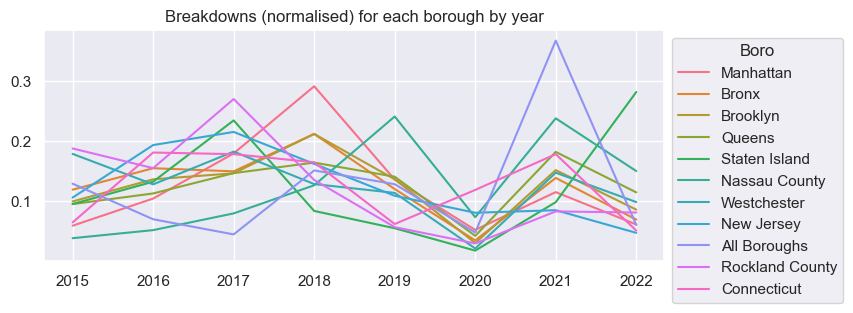

In [135]:
sns.set(rc={'figure.figsize': (8, 3)})

ax = sns.lineplot(data=chart1_data, x="School_Year", y="count", hue="Boro")
ax.set(title="Breakdowns (normalised) for each borough by year", xlabel=None,
       ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


At this point, realising how cumbersome data visualisation outside of ggplot2 is... Might just focus on the data wrangling in pandas for the next ones:

2. Breakdowns by year broken down by company:
    - Here, need to filter down the number of companies, let's pick top 10 most frequent ones.
    - Impact of Covid shows the same pattern, otherwise no discernible trend over time

In [169]:
biggest_companies = (data
    .value_counts(["Bus_Company_Name"])
    .reset_index(name="count")
    .nlargest(columns="count", n=10)["Bus_Company_Name"]
    .tolist()
)

biggest_companies

['LEESEL TRANSPORTATION CORP (B2192)',
 'PIONEER TRANSPORTATION CORP',
 'G.V.C., LTD.',
 'BORO TRANSIT, INC.',
 'RELIANT TRANSPORTATION, INC (B2321)',
 'VAN TRANS LLC (B2192)',
 'HOYT TRANSPORTATION CORP.',
 'ALLIED TRANSIT CORP.',
 'PRIDE TRANSPORTATION (SCH AGE)',
 'L & M BUS CORP.']

In [176]:
chart2_data = (data
    .query("Bus_Company_Name in @biggest_companies")
    .value_counts(["School_Year", "Bus_Company_Name"])
    .reset_index(name="count")
    .assign(count = lambda x: x["count"] / x.groupby("Bus_Company_Name")["count"].transform("sum"))
)

chart2_data

,School_Year,Bus_Company_Name,count
0,2018,LEESEL TRANSPORTATION CORP (B2192),0.417254
1,2019,LEESEL TRANSPORTATION CORP (B2192),0.201864
2,2021,LEESEL TRANSPORTATION CORP (B2192),0.162252
3,2017,PIONEER TRANSPORTATION CORP,0.281732
4,2018,"RELIANT TRANSPORTATION, INC (B2321)",0.388222
...,...,...,...
69,2020,"G.V.C., LTD.",0.019157
70,2020,ALLIED TRANSIT CORP.,0.007506
71,2016,PIONEER TRANSPORTATION CORP,0.001205
72,2015,PIONEER TRANSPORTATION CORP,0.000723


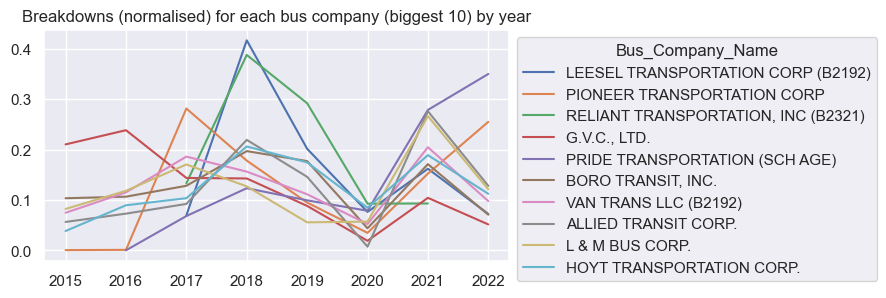

In [180]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.lineplot(data=chart2_data, x="School_Year", y="count", hue="Bus_Company_Name")
ax.set(title="Breakdowns (normalised) for each bus company (biggest 10) by year", xlabel=None,
       ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


3. How long the buses are delayed 
    - over time
    - by company/borough

In [201]:
# Mean delay by year
(data
    .groupby("School_Year")
    .agg(mean_delay = ("How_Long_Delayed", np.mean))
    .reset_index()
)

,School_Year,mean_delay
0,2015,24.476783
1,2016,25.539981
2,2017,24.357645
3,2018,29.636872
4,2019,26.666013
5,2020,27.904188
6,2021,27.412048
7,2022,33.243346


Looks like average delays have not changed in recent years. Let's see the development by borough:

In [205]:
chart3_data = (data
    .dropna(subset="Boro")
    .groupby(["School_Year", "Boro"], as_index=False)
    .agg(mean_delay = ("How_Long_Delayed", np.mean))
)

chart3_data

,School_Year,Boro,mean_delay
0,2015,All Boroughs,30.762195
1,2015,Bronx,19.760874
2,2015,Brooklyn,30.293434
3,2015,Connecticut,24.375000
4,2015,Manhattan,25.192444
...,...,...,...
83,2022,New Jersey,28.963964
84,2022,Queens,36.842200
85,2022,Rockland County,32.356322
86,2022,Staten Island,38.223675


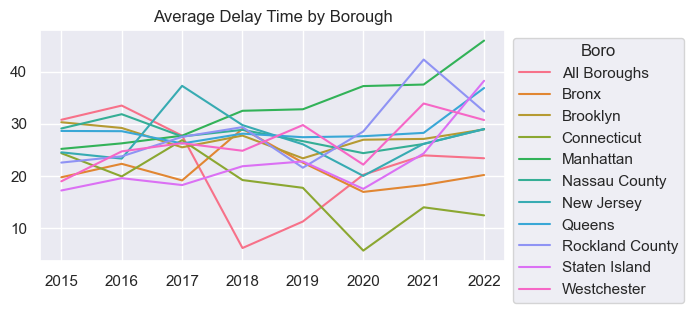

In [207]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.lineplot(data=chart3_data, x="School_Year", y="mean_delay", hue="Boro")
ax.set(title="Average Delay Time by Borough", xlabel=None,
       ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


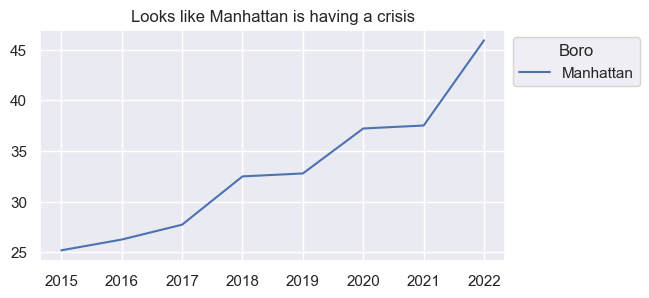

In [209]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.lineplot(data=chart3_data.query("Boro == 'Manhattan'"),
                  x="School_Year", y="mean_delay", hue="Boro")
ax.set(title="Looks like Manhattan is having a crisis", xlabel=None,
       ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

3. How long the buses are delayed 
    - over time
    - by company/borough

## Big learning: Can just use "count" **inside** `agg`, instead of adding count and then aggregating to unique

In [232]:
chart4_data = (data
    .groupby(["School_Year", "Boro"], as_index=False)
    .agg(students_affected = ("Number_Of_Students_On_The_Bus", np.sum),
         buses = ("Boro", "count"))
    .assign(per_boro = lambda x: x["students_affected"] / x["buses"])
)

chart4_data

,School_Year,Boro,students_affected,buses,per_boro
0,2015,All Boroughs,426,164,2.597561
1,2015,Bronx,58694,13679,4.290811
2,2015,Brooklyn,47225,10752,4.392206
3,2015,Connecticut,37,24,1.541667
4,2015,Manhattan,23004,7358,3.126393
...,...,...,...,...,...
83,2022,New Jersey,240,111,2.162162
84,2022,Queens,14039,7237,1.939892
85,2022,Rockland County,224,87,2.574713
86,2022,Staten Island,5120,7037,0.727583


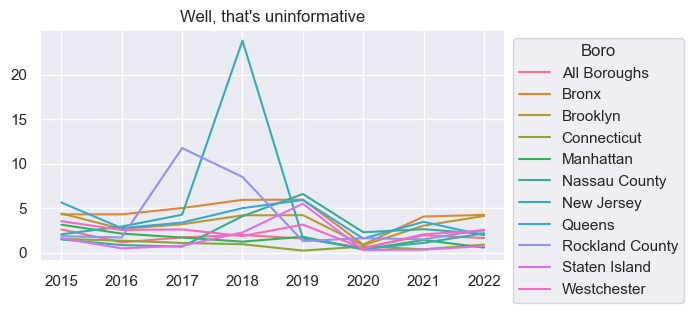

In [234]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.lineplot(data=chart4_data,
                  x="School_Year", y="per_boro", hue="Boro")
ax.set(title="Well, that's uninformative", xlabel=None,
       ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [244]:
chart4_data = (data
    .groupby(["Boro"], as_index=False)
    .agg(students_affected = ("Number_Of_Students_On_The_Bus", np.sum),
         buses = ("Boro", "count"))
    .assign(per_boro = lambda x: x["students_affected"] / x["buses"])
    .sort_values("per_boro", ascending=False)
    .reset_index(drop=True)
    .style.bar(subset="per_boro", color="firebrick")
)

chart4_data

,Boro,students_affected,buses,per_boro
0,New Jersey,13932,2336,5.964041
1,Rockland County,5758,1070,5.381308
2,Bronx,548587,114655,4.784676
3,Queens,246492,63019,3.911392
4,Brooklyn,384048,107790,3.562928
5,Nassau County,47152,14023,3.362476
6,Westchester,26353,10206,2.582109
7,All Boroughs,2321,1269,1.828999
8,Manhattan,188578,123860,1.522509
9,Staten Island,28237,24976,1.130565


Looks like New Jersey has the most crowded buses. Still very low number of people on a bus on average, it seems like...

5. Which reasons occur most frequently at which times in
    - the week
    - a day

In [265]:
data["hour"] = data["Occurred_On"].dt.hour
data["month"] = data["Occurred_On"].dt.month
data["day"] = data["Occurred_On"].dt.day_of_year

In [ ]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.lineplot(data=chart4_data,
                  x="School_Year", y="per_boro", hue="Boro")
ax.set(title="Well, that's uninformative", xlabel=None,
       ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

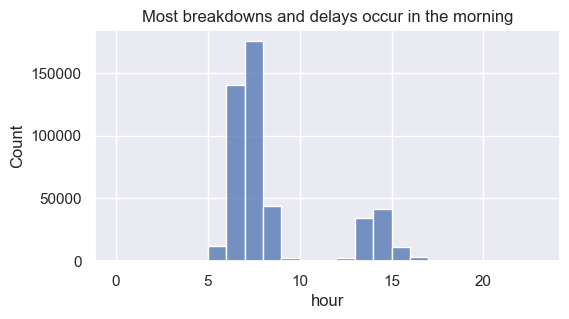

In [365]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.histplot(data=data["hour"], binwidth=1)
ax.set(title="Most breakdowns and delays occur in the morning")
plt.show()

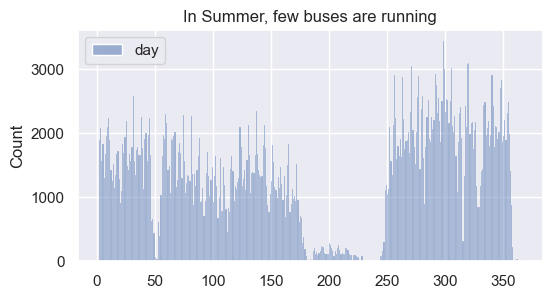

In [367]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.histplot(data[["day"]], binwidth=1)
ax.set(title="In Summer, few buses are running")
plt.show()

In [272]:
chart5_data = (data
    .value_counts(["Reason", "hour"])
    .reset_index(name="count")
)

chart5_data

,Reason,hour,count
0,Heavy Traffic,7,129289
1,Heavy Traffic,6,91223
2,Heavy Traffic,8,35204
3,Other,7,26164
4,Heavy Traffic,14,25083
...,...,...,...
205,Mechanical Problem,22,1
206,Flat Tire,20,1
207,Weather Conditions,20,1
208,Flat Tire,19,1


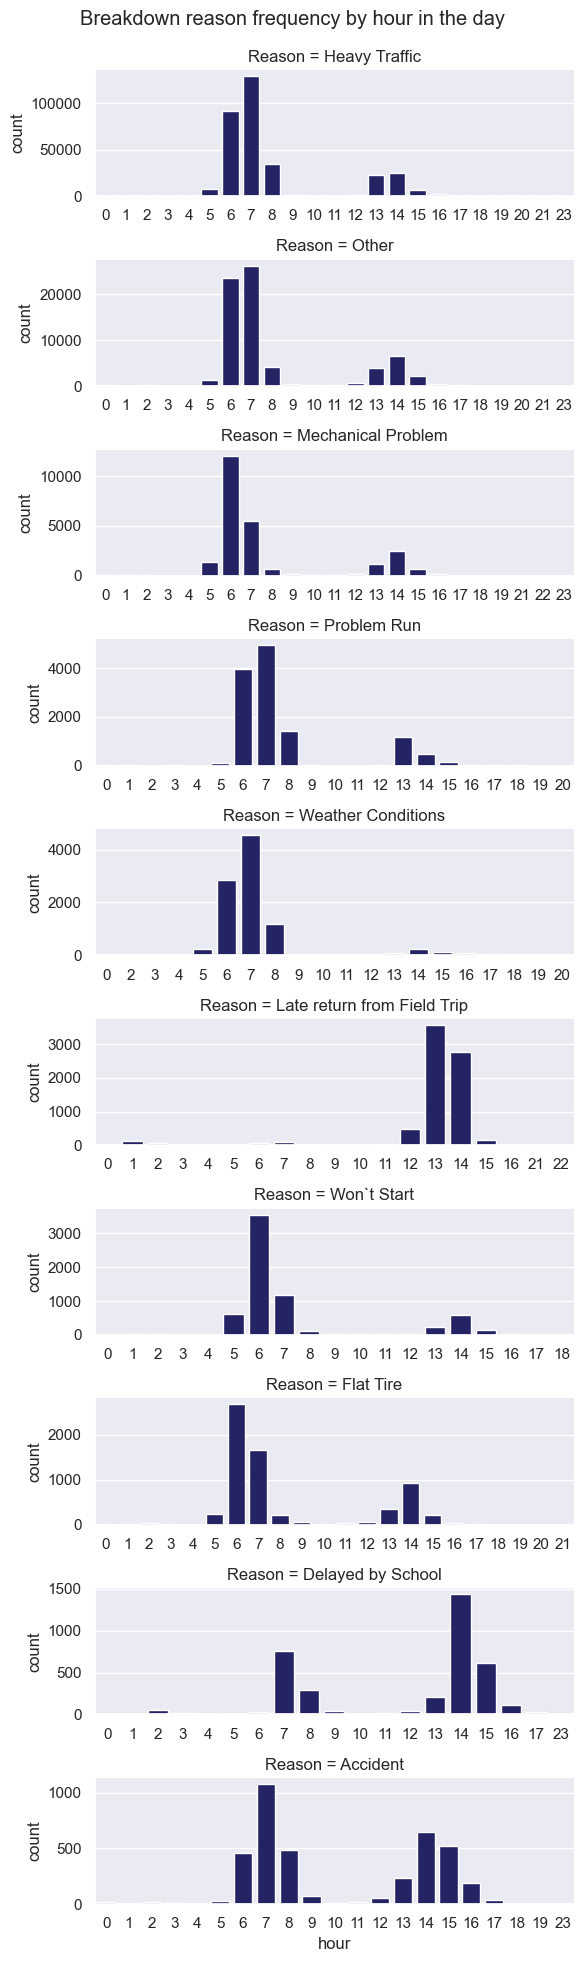

In [363]:
ax = sns.catplot(chart5_data, x="hour", y="count", row="Reason", color="midnightblue",
            kind="bar", sharex=False, sharey=False, height=2, aspect=3)
ax.fig.subplots_adjust(top=0.95)
ax.fig.suptitle("Breakdown reason frequency by hour in the day")
plt.show()

In [304]:
data["week"] = data["Occurred_On"].dt.week

chart6_data = (data
    .value_counts(["week", "Reason"])
    .reset_index(name="count")
)

chart6_data

C:\Users\mathi\AppData\Local\Temp\ipykernel_3256\107869240.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


,week,Reason,count
0,43,Heavy Traffic,12475
1,44,Heavy Traffic,11694
2,42,Heavy Traffic,11488
3,39,Heavy Traffic,11387
4,40,Heavy Traffic,11043
...,...,...,...
504,52,Problem Run,1
505,31,Weather Conditions,1
506,33,Problem Run,1
507,34,Other,1


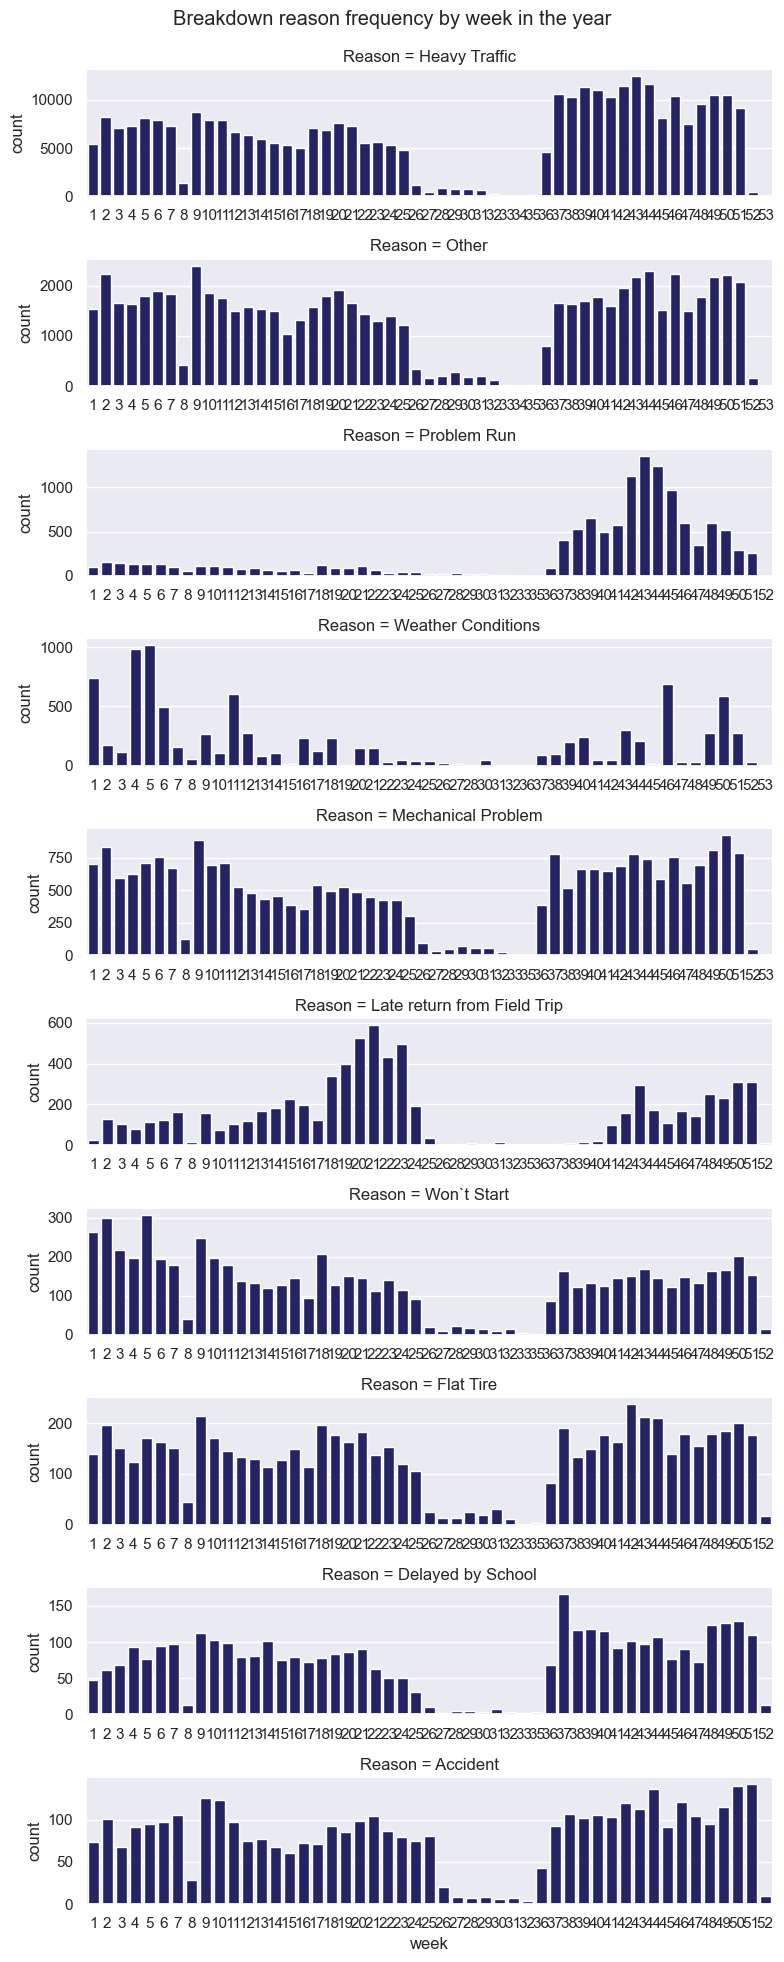

In [332]:
ax = sns.catplot(chart6_data, x="week", y="count", row="Reason", color="midnightblue",
            kind="bar", sharex=False, sharey=False, height=2, aspect=4)
ax.fig.subplots_adjust(top=0.95)
ax.fig.suptitle("Breakdown reason frequency by week in the year")
plt.show()

6. Average delay by reason of delay

In [400]:
chart7_data = (data
    .groupby("Reason")
    .agg(mean_delay = ("How_Long_Delayed", np.mean))
    .reset_index()
    .sort_values("mean_delay", ascending=False)
)

chart7_data.reset_index(drop=True).style.bar("mean_delay", color="firebrick")

,Reason,mean_delay
0,Accident,38.013761
1,Problem Run,36.001287
2,Flat Tire,32.093414
3,Mechanical Problem,31.980808
4,Won`t Start,31.068774
5,Other,29.264450
6,Weather Conditions,26.710125
7,Late return from Field Trip,26.284700
8,Heavy Traffic,26.007269
9,Delayed by School,19.500821


In [394]:
list(sns.color_palette()[9])

[0.39215686274509803, 0.7098039215686275, 0.803921568627451]

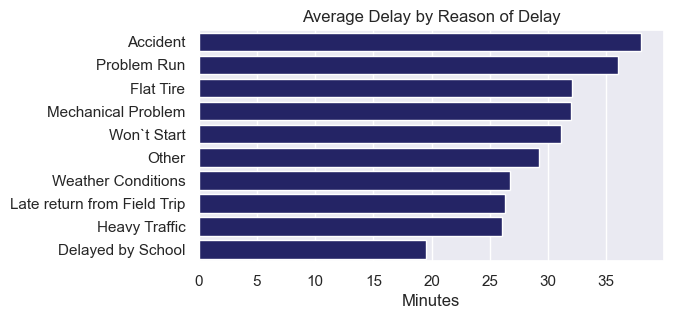

In [372]:
sns.set(rc={'figure.figsize': (6, 3)})

ax = sns.barplot(chart7_data, x="mean_delay", y="Reason", color="midnightblue")
ax.set(title="Average Delay by Reason of Delay", xlabel="Minutes",
       ylabel=None)

plt.show()

# That's it!